# plot chart on second y-axis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
print(f'pandas version:  {pd.__version__}')
print(f'seaborn version: {sns.__version__}')

pandas version:  0.25.3
seaborn version: 0.9.0


In [3]:
pd.Timestamp.now()

Timestamp('2020-01-11 09:13:24.618341')

## DJI index (monthly)

In [10]:
dj=pd.read_csv('https://stooq.com/q/d/l/?s=^dji&i=m', parse_dates=['Date'], index_col='Date')
dj

,Open,High,Low,Close,Volume
Date,,,,,
1896-05-31,29.39,29.43,29.11,29.43,NaN
1896-06-30,29.40,29.40,25.73,26.18,NaN
1896-07-31,25.05,25.49,22.09,23.19,NaN
1896-08-31,22.81,23.15,20.76,23.15,NaN
1896-09-30,23.19,26.51,23.19,26.11,NaN
...,...,...,...,...,...
2019-09-30,26198.26,27306.73,25978.22,26916.83,1.675867e+09
2019-10-31,26962.54,27204.36,25743.46,27046.23,1.660483e+09
2019-11-30,27142.95,28174.97,27142.95,28051.41,1.457405e+09


## SET index (monthly)

In [11]:
ds=pd.read_csv('https://stooq.com/q/d/l/?s=^set&i=m', parse_dates=['Date'], index_col='Date')
ds

,Open,High,Low,Close,Volume
Date,,,,,
1975-04-30,100.00,100.00,100.00,100.00,NaN
1975-05-31,89.98,89.98,89.98,89.98,NaN
1975-06-30,91.64,91.64,91.64,91.64,NaN
1975-07-31,98.02,98.02,98.02,98.02,NaN
1975-08-31,98.39,98.39,98.39,98.39,NaN
...,...,...,...,...,...
2019-09-30,1651.20,1679.65,1620.77,1637.22,5.942248e+10
2019-10-31,1637.59,1640.15,1579.13,1601.49,5.143452e+10
2019-11-30,1600.73,1642.50,1580.08,1590.59,6.115502e+10


In [18]:
df=pd.merge(dj['Close'], ds['Close'], how='inner', left_index=True, right_index=True, suffixes=['_DJI', '_SET'])
df

,Close_DJI,Close_SET
Date,,
1975-04-30,821.30,100.00
1975-05-31,832.30,89.98
1975-06-30,879.00,91.64
1975-07-31,831.50,98.02
1975-08-31,835.30,98.39
...,...,...
2019-09-30,26916.83,1637.22
2019-10-31,27046.23,1601.49
2019-11-30,28051.41,1590.59


## single y-axis plot

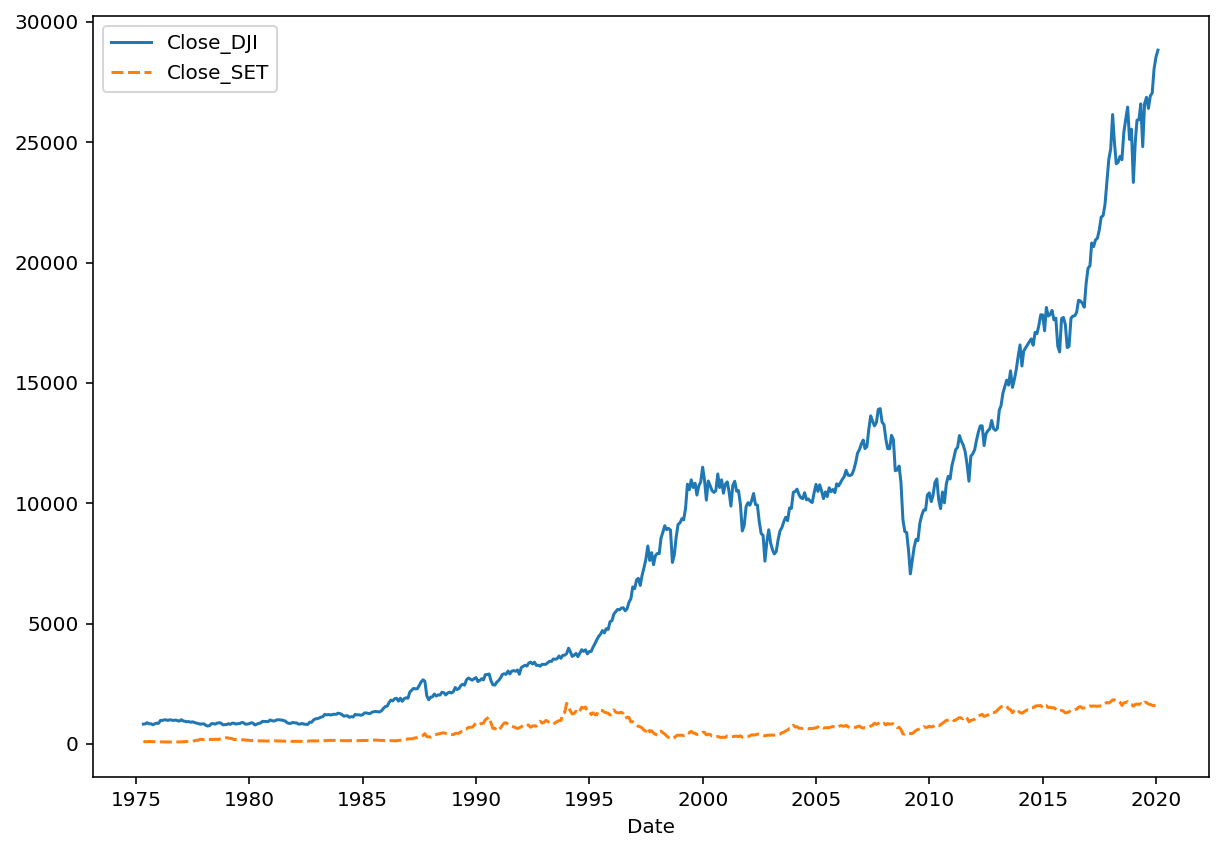

In [20]:
plt.figure(figsize=(10, 7))
sns.lineplot(data=df)

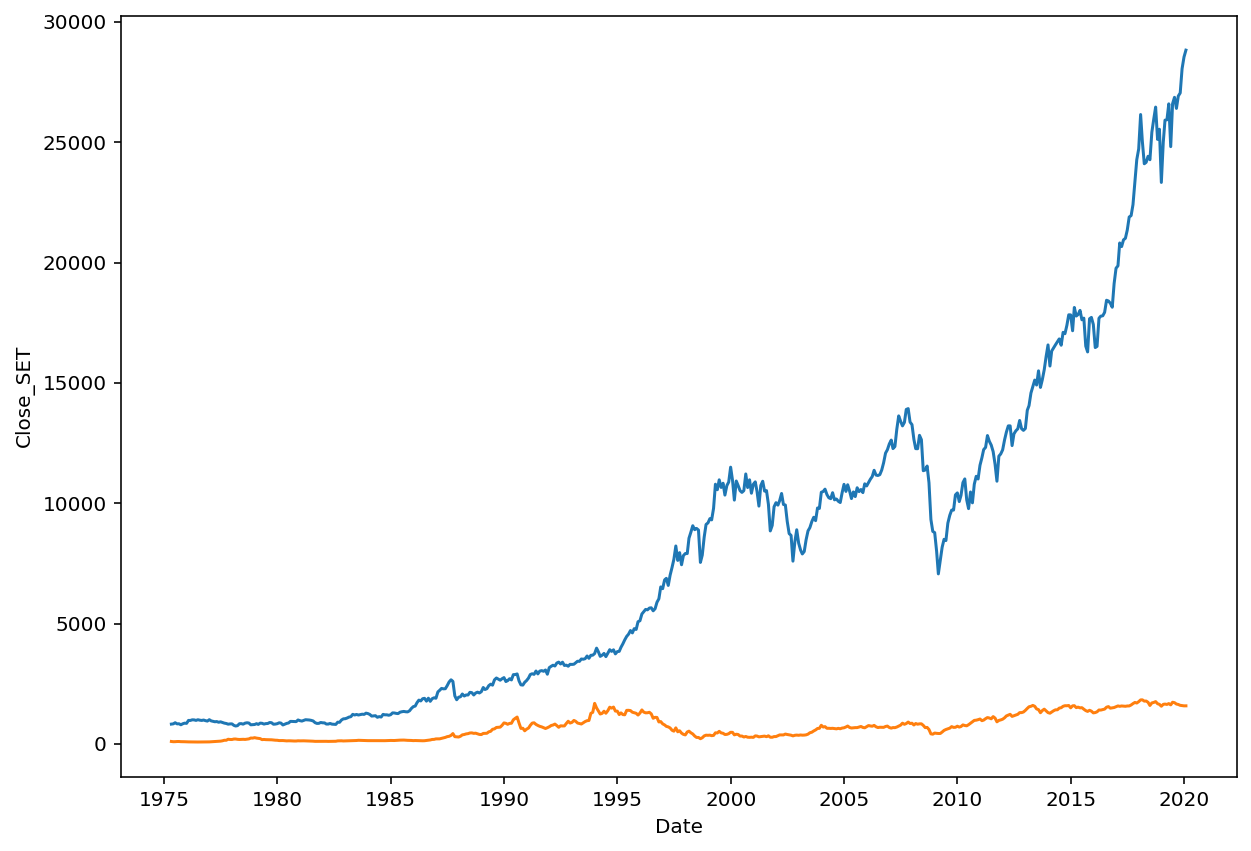

In [22]:
plt.figure(figsize=(10, 7))
sns.lineplot(df.index, df['Close_DJI'])
sns.lineplot(df.index, df['Close_SET'])

## second y-axis plot

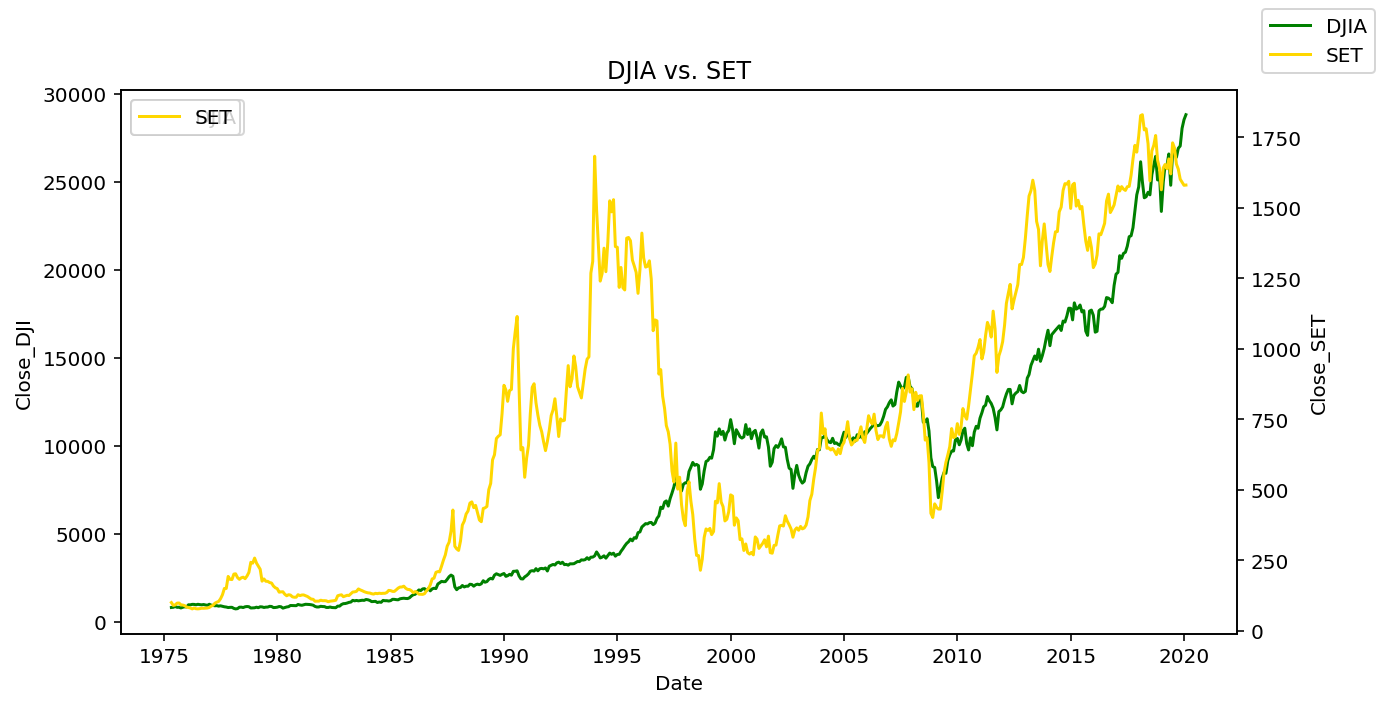

In [27]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(df.index, df['Close_DJI'], ax=ax, color='green', label='DJIA')

ax2=ax.twinx()

sns.lineplot(df.index, df['Close_SET'], ax=ax2, color='gold', label='SET')

plt.title('DJIA vs. SET')
fig.legend()